In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

Download the data

In [2]:
fashionmnist = fetch_openml(data_id=40996)

/Users/stephenkullman/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Labels for each photo

In [3]:
labels_s = '0 T-shirt/top \n1 Trouser \n2 Pullover \n3 Dress \n4 Coat \n5 Sandal \n6 Shirt \n7 Sneaker \n8 Bag \n9 Ankle boot'

In [4]:
labels_s

'0 T-shirt/top \n1 Trouser \n2 Pullover \n3 Dress \n4 Coat \n5 Sandal \n6 Shirt \n7 Sneaker \n8 Bag \n9 Ankle boot'

Dictionary comprehension using the number and label

In [5]:
fashion_label_translation = { 
    int(k): v for k, v in [ 
        item.split(maxsplit=1) for item in labels_s.split('\n') ] }

Function to convert label to numeric

In [6]:
def translate_label(y, translation = fashion_label_translation):
    return pd.Series(y).apply(lambda y: translation[int(y)]).values

In [7]:
def display_fashion(img, target, ax):
    if len(img.shape):
        w = int(np.sqrt(img.shape[0]))
        img = img.reshape(((w,w)))
    ax.imshow(img, cmap='Greys')
    ax.set_title(f'{target}')
    ax.grid(False)


Train-test Split

In [8]:
from sklearn.model_selection import train_test_split

fashion_mnist_sample = {}

fashion_mnist_sample['data'], _, fashion_mnist_sample['target'], _ = train_test_split(
    fashionmnist['data'], fashionmnist['target'], train_size = 10000
    )

x, y = fashion_mnist_sample['data'], fashion_mnist_sample['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2)


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
translation = fashion_label_translation
y_train_translated = translate_label(y_train, translation = translation)
y_test_translated = translate_label(y_test, translation = translation)

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_translated)
y_test_encoded = le.fit_transform(y_test_translated)

/var/folders/l9/qjwh76rx6wjbn8s0p0_2hd9w0000gp/T/ipykernel_41101/1744272369.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


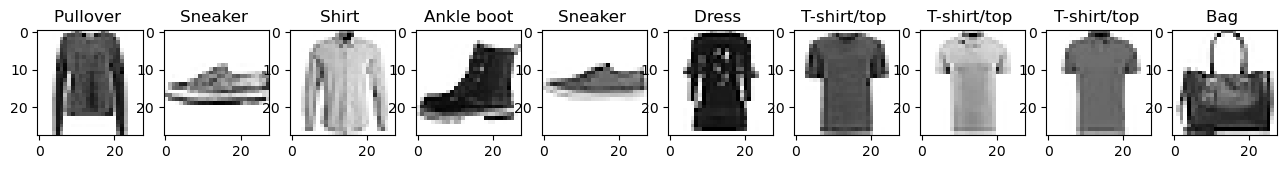

In [14]:
import random
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(16, 12))

for i in range(10):
    rand = random.choice(range(x_train.shape[0])) 
    display_fashion(x_train[rand], y_train_translated[rand], axs[i])

fig.show()

Training a Neural Network

In [20]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=500)
clf.fit(x_train, y_train_encoded)
y_test_pred =  clf.predict(x_test)


<Axes: title={'center': 'Loss Curve; stopped after 159 epochs'}>

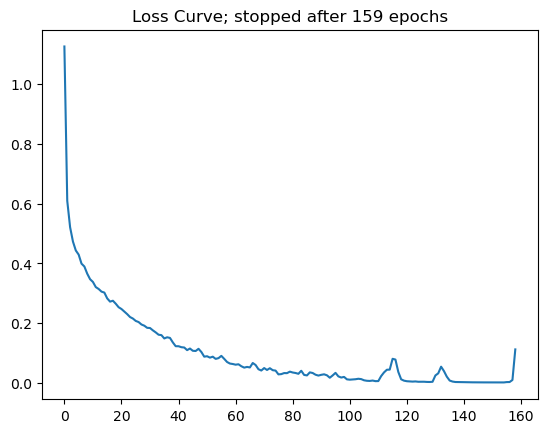

In [21]:
pd.Series(clf.loss_curve_).plot(
    title=f'Loss Curve; stopped after {clf.n_iter_} epochs'
)

Seeing effects of learning rate

1 

/Users/stephenkullman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1 

/Users/stephenkullman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


0.01 

/Users/stephenkullman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


0.001 

/Users/stephenkullman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


0.0001 

/Users/stephenkullman/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/var/folders/l9/qjwh76rx6wjbn8s0p0_2hd9w0000gp/T/ipykernel_41101/1590413739.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


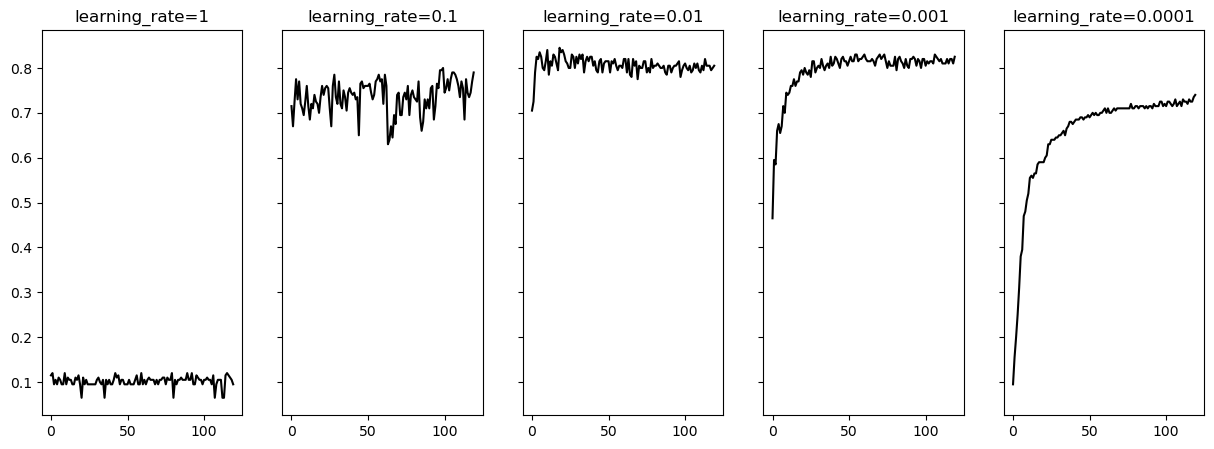

In [23]:
learning_rate_init_options = [1, 0.1, 0.01, 0.001, 0.0001]

fig, axs = plt.subplots(1, len(learning_rate_init_options), figsize=(15, 5), sharex=True, sharey=True)

for i, learning_rate_init in enumerate(learning_rate_init_options):
    print(f'{learning_rate_init} ', end='') 
    clf = MLPClassifier(
        hidden_layer_sizes=(500, ), 
        learning_rate='constant', 
        learning_rate_init=learning_rate_init, 
        validation_fraction=0.2, 
        early_stopping=True, 
        n_iter_no_change=120, 
        max_iter=120, 
        solver='sgd', 
        batch_size=25,
        verbose=0,) 
    
    clf.fit(x_train[:1000,:], y_train_encoded[:1000]) 
    pd.Series(clf.validation_scores_).plot( title=f'learning_rate={learning_rate_init}', kind='line', color='k', ax=axs[i] )
fig.show()

When Lr=1, the model accuracy was only 10%, but at other learning rates, the accuracy increased